<a href="https://colab.research.google.com/github/satyajittarai/2018-cycle-2/blob/master/Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#Installing required packages fastai and torch
!pip install fastai
!pip install torch

  Running setup.py bdist_wheel for wrapt ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built wrapt
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: wrapt 1.11.1
    Uninstalling wrapt-1.11.1:
      Successfully uninstalled wrapt-1.11.1


In [0]:
# This file contains all the main external libs we'll use# This  
from fastai.vision import *

In [5]:
#Uploading Dataset from local devices
from google.colab import files
uploaded = files.upload()

Saving leaf.zip to leaf (1).zip


In [7]:

#Checking for uploaded files
!ls

'leaf (1).zip'	 leaf.zip   sample_data


In [8]:
#Unzip files
!unzip 'leaf (1).zip'

Archive:  leaf (1).zip
   creating: leaf/train/
   creating: leaf/train/banyan/
  inflating: leaf/train/banyan/1_390239_FS.JPG  
  inflating: leaf/train/banyan/101428430_banyan_tree_leaves.jpg  
  inflating: leaf/train/banyan/108169192_green_leaves_background_of_ficus_annulata_or_banyan_tree_leaf_and_sand_.jpg  
  inflating: leaf/train/banyan/108173961_green_leaves_background_of_ficus_annulata_or_banyan_tree_leaf_.jpg  
  inflating: leaf/train/banyan/12pcs_60cm_Green_Leaves_Silk_Artificial_White_Banyan_Tree_Leaf_Plant_Branch_Home_Wedding_Garden_Backdrop.jpg  
  inflating: leaf/train/banyan/12pcs_60cm_Green_Leaves_Silk_Artificial_White_Banyan_Tree_Leaf_Plant_Branch_Home_Wedding_Garden_Backdrop.jpg_q50.jpg  
  inflating: leaf/train/banyan/1455780014.jpg  
  inflating: leaf/train/banyan/183226941_38714da37d_z.jpg  
  inflating: leaf/train/banyan/187_1879810_banyan_tree_clipart_leaf_banyan_tree_logo_png.png  
  inflating: leaf/train/banyan/206_2062912_banyan_tree_banyan_tree_leaf_png.png  

In [9]:
#Checking for unzip files
!ls

 leaf  'leaf (1).zip'   leaf.zip   sample_data


In [0]:
#Creating classes for classification 
classes = ['banyan','mango','neem','papaya']

In [0]:
#Setting path variable
path = Path('leaf')

In [38]:
#Vaerifying image and taking action
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

banyan


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:95: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


mango


neem


papaya


In [0]:
#Viewing data, splitting into validation dataset, transformation, resize all data to 224 and normalization
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [40]:
#Checking claas of data
data.classes

['banyan', 'mango', 'neem', 'papaya']

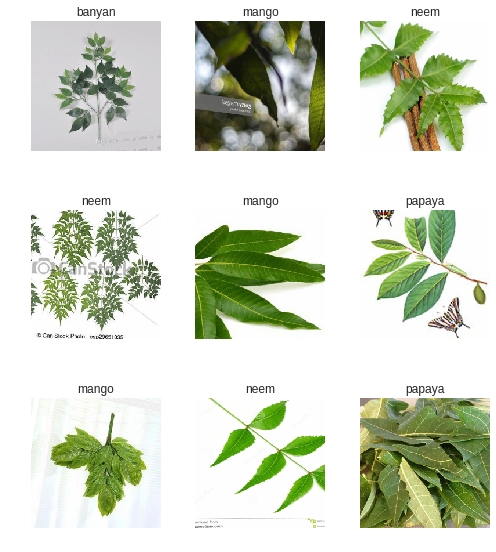

In [41]:

#Sample of data 
data.show_batch(rows=3, figsize=(7,8))

In [42]:
#Classes of data, Number of calsses, length of train data set, length of validation dataset
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['banyan', 'mango', 'neem', 'papaya'], 4, 304, 76)

In [0]:
#Creating learning model using resnet 34, Can be change 50, 101 etc
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [44]:
#Running model for 4 epoch, Base on hardware and time epoch can be modified for beeter learning and less loss
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.781404,1.266759,0.565789
2,1.397760,0.801127,0.302632
3,1.109915,0.609393,0.236842
4,0.963910,0.572554,0.210526


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


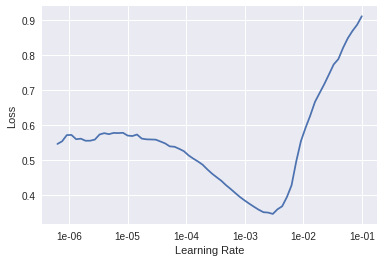

In [48]:
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.849999,11.498755,0.552632
2,0.848794,3.496372,0.394737


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

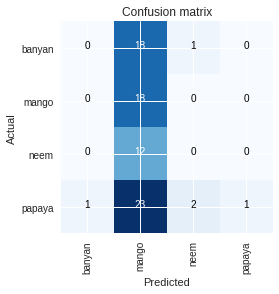

In [53]:
interp.plot_confusion_matrix()